# Analyse des Données du DELF : Inscriptions, Présences et Admissions

**le DELF (Diplôme d'Études en Langue Française) est une certification officelle  reconnue internationalement qui valide les compéténces en lanque francaise pour les non-francophones . il est structuré en Niveaux (A1 à C2) et évalue l'expression orale et écrit , anisi que la compréhension orale et écrite**

**Le fichier contient des données sur le DELF : inscription , présences , admission par Pays , Ville , centre , Niveau , année et codes ISO/géographiques.**

## importer des librairies

**Nous commençons par importer les bibliothèques nécessaires pour notre analyse**

**Nous utilisons Numpy pour effectuer des calculs mathématiques avancés, Pandas pour manipuler les données sous forme de tableaux, et Matplotlib pour créer des graphiques afin de visualiser les résultats.**

In [389]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

## Charger et Explorer les Donées 

**Charger le fichier**

**Ici, nous chargeons notre fichier de données qui contient les informations à analyser.**

In [394]:
data = pd.read_csv("delf.csv", sep=";")

**Afficher les dimensions et les colonnes**

**Avec data.shape, on vérifie le nombre de lignes et de colonnes dans notre tableau de données pour comprendre sa structure avant de commencer l'analyse.**

In [398]:
print ( " Dimensions du DataFrame : " , data.shape )

 Dimensions du DataFrame :  (7573, 11)


**Afficher les noms des colonnes d'un DataFrame**

**Avec data.columns, on affiche la liste des noms des colonnes de notre tableau. Cela nous permet de vérifier quelles informations sont disponibles dans les données et de les utiliser correctement pour l'analyse.**

In [401]:
data.columns

Index(['Pays', 'Ville', 'Centre', 'Declinaison', 'Niveau', 'Année', 'Inscrits',
       'Presents', 'Admis', 'ISO_pays', 'COG_pays'],
      dtype='object')

**Type des colonnes**

In [404]:
data.dtypes

Pays            object
Ville           object
Centre          object
Declinaison     object
Niveau          object
Année            int64
Inscrits         int64
Presents         int64
Admis          float64
ISO_pays        object
COG_pays         int64
dtype: object

**Apercu des premières lignes**

**Avec data.head(), on affiche les premières lignes de notre tableau. Cela nous permet d'avoir un aperçu des données pour vérifier leur contenu et leur organisation avant de commencer l'analyse.**

In [407]:
data.head()

,Pays,Ville,Centre,Declinaison,Niveau,Année,Inscrits,Presents,Admis,ISO_pays,COG_pays
0,Mexique,Juárez,"Alianza Francesa de Cd Juárez, A.C",DELF scolaire/junior,B1,2023,1,1,1.0,MEX,99405
1,Mexique,Juárez,"Alianza Francesa de Cd Juárez, A.C",DELF-DALF tout public,A1,2023,1,1,1.0,MEX,99405
2,Mexique,Juárez,"Alianza Francesa de Cd Juárez, A.C",DELF-DALF tout public,B1,2023,14,13,10.0,MEX,99405
3,France,Cayenne Cedex,"Centre pénitentiaire de Guyane, Unité locale ...",DELF-DALF tout public,A1,2023,6,6,6.0,FRA,99100
4,France,Cayenne Cedex,"Centre pénitentiaire de Guyane, Unité locale ...",DELF-DALF tout public,A2,2023,10,10,10.0,FRA,99100


## Nettoyage des données 

***Supprimer des Colonnes spécifiques***

**Nous avons utilisé la fonction data.drop() pour supprimer les colonnes ISO_pays, COG_pays, et Année. Les deux premières colonnes contiennent des codes de pays qui ne sont pas nécessaires pour notre analyse, tandis que la colonne Année a été supprimée car les données concernent uniquement l'année 2023. Cette étape simplifie le tableau en éliminant les informations non pertinentes, ce qui le rend plus clair et mieux adapté à notre étude.**

In [411]:
data = data.drop(["ISO_pays","Année","COG_pays"] , axis = 1) 


**Vérifier les dimensions du DataFrame après supprimer des solonnes**

In [414]:
data.shape

(7573, 8)

**Générer un résumé statistique après ssupprimer des solonnes**

In [417]:
data.describe()

,Inscrits,Presents,Admis
count,7573.000000,7573.000000,7397.000000
mean,64.597121,61.619041,53.030012
std,194.234292,187.057763,166.338271
min,1.000000,0.000000,1.000000
25%,4.000000,4.000000,4.000000
50%,14.000000,14.000000,12.000000
75%,50.000000,48.000000,41.000000
max,6009.000000,5916.000000,5298.000000


**Compter le nombre de valeus uniques par colonnes**

In [420]:
data.nunique()

Pays            161
Ville           941
Centre         1077
Declinaison       3
Niveau            7
Inscrits        557
Presents        536
Admis           496
dtype: int64

## Ajouter des colonnes : Taux_admission , Abscent , Non Admis , Taux Non Admis 
**Nous avons ajouté quatre colonnes : Taux_admission pour le pourcentage des admis, Absents pour le nombre d'inscrits absents, Non Admis pour les présents non admis, et Taux Non Admis pour leur pourcentage. Ces ajouts rendent l'analyse plus complète.**

In [423]:
data["Taux_admission"] =( data["Admis"] / data ["Presents"])*100

data["Absents"] = data ["Inscrits"] - data["Presents"] 

data["Non Admis"] = data ["Presents"] - data["Admis"]

data["Taux Non Admis"] = ( data["Non Admis"] / data["Presents"] )*100

**Vérifier les dimensions après l'ajout de nouvelles colonnes**

In [426]:
data.shape

(7573, 12)

**Générer un résumé statistique après l'ajout de nouvelles colonnes**

In [429]:
data.describe()

,Inscrits,Presents,Admis,Taux_admission,Absents,Non Admis,Taux Non Admis
count,7573.000000,7573.000000,7397.000000,7397.000000,7573.000000,7397.000000,7397.000000
mean,64.597121,61.619041,53.030012,86.115080,2.978080,10.007435,13.884920
std,194.234292,187.057763,166.338271,17.816396,11.579615,32.724939,17.816396
min,1.000000,0.000000,1.000000,4.081633,0.000000,0.000000,0.000000
25%,4.000000,4.000000,4.000000,77.777778,0.000000,0.000000,0.000000
50%,14.000000,14.000000,12.000000,93.103448,0.000000,1.000000,6.896552
75%,50.000000,48.000000,41.000000,100.000000,1.000000,7.000000,22.222222
max,6009.000000,5916.000000,5298.000000,100.000000,285.000000,704.000000,95.918367


****Afficher un apercu après suppression et ajout de colonnes****

**Avec data.head(), nous affichons les premières lignes du tableau après avoir supprimé certaines colonnes et ajouté de nouvelles. Cela permet de vérifier que les modifications ont bien été prises en compte et d’avoir un aperçu de la structure finale des données.**

In [432]:
print ( "\033[1mAprès suppression et les ajouts : \033[0m")
data.head()

Après suppression et les ajouts : 


,Pays,Ville,Centre,Declinaison,Niveau,Inscrits,Presents,Admis,Taux_admission,Absents,Non Admis,Taux Non Admis
0,Mexique,Juárez,"Alianza Francesa de Cd Juárez, A.C",DELF scolaire/junior,B1,1,1,1.0,100.000000,0,0.0,0.000000
1,Mexique,Juárez,"Alianza Francesa de Cd Juárez, A.C",DELF-DALF tout public,A1,1,1,1.0,100.000000,0,0.0,0.000000
2,Mexique,Juárez,"Alianza Francesa de Cd Juárez, A.C",DELF-DALF tout public,B1,14,13,10.0,76.923077,1,3.0,23.076923
3,France,Cayenne Cedex,"Centre pénitentiaire de Guyane, Unité locale ...",DELF-DALF tout public,A1,6,6,6.0,100.000000,0,0.0,0.000000
4,France,Cayenne Cedex,"Centre pénitentiaire de Guyane, Unité locale ...",DELF-DALF tout public,A2,10,10,10.0,100.000000,0,0.0,0.000000


## Analyse des Performances par Niveau : Inscrits , Présents, Admis , Non Admis , Taux_admission, Taux Non Admis  

**Dans cette étape, nous analysons les performances par niveau en regroupant les données et en calculant plusieurs indicateurs clés : le nombre d'inscrits, de présents, d'absents, d'admis, et de non admis ainsi que les taux d'admission et de non-admission.**

**Cette approche permet de présenter les données sous forme de tableaux organisés et faciles à comprendre. Bien que cela semble un peu technique, ces tableaux nous donnent une vue d’ensemble claire des résultats par niveau. Ils serviront ensuite de base pour des visualisations graphiques qui rendront les tendances encore plus évidentes.**

In [435]:

niveau_counts = data.groupby("Niveau")["Inscrits"].sum()
print("\033[1mNombre d'inscription par niveau :\033[0m")
print(niveau_counts.sort_values()[::-1])

presents_par_niveau = data.groupby("Niveau")["Presents"].sum()
print("\033[1mNombre de présents  par niveau :\033[0m")
print(presents_par_niveau.sort_values())

Absents_par_niveau = data.groupby("Niveau")["Absents"].sum()
print("\033[1mNombre d'absents  par niveau :\033[0m")
print(Absents_par_niveau.sort_values())

admis_par_niveau = data.groupby("Niveau")["Admis"].sum()
print("\033[1mNombre d'admis par niveau :\033[0m")
print(admis_par_niveau.sort_values()[::-1])

taux_admission_par_niveau = ( admis_par_niveau / presents_par_niveau ) * 100
print ( "\033[1mTaux d'admission par niveau :\033[0m")
print ( taux_admission_par_niveau.sort_values()[::-1])

non_admis_par_niveau = data.groupby("Niveau")["Non Admis"].sum()
print("\033[1mNombre Non admis  par niveau :\033[0m")
print(non_admis_par_niveau.sort_values())

taux_nonAdmis_par_niveau = ( non_admis_par_niveau / presents_par_niveau ) * 100
print ( "\033[1mTaux de Non Admis  par niveau :\033[0m")
print ( taux_nonAdmis_par_niveau.sort_values()[::-1])





Nombre d'inscription par niveau :
Niveau
B1      127389
A2      121298
B2      101115
A1       93973
C1       24083
A1.1     12370
C2        8966
Name: Inscrits, dtype: int64
Nombre de présents  par niveau :
Niveau
C2        8459
A1.1     11820
C1       22656
A1       88459
B2       97204
A2      115524
B1      122519
Name: Presents, dtype: int64
Nombre d'absents  par niveau :
Niveau
C2       507
A1.1     550
C1      1427
B2      3911
B1      4870
A1      5514
A2      5774
Name: Absents, dtype: int64
Nombre d'admis par niveau :
Niveau
A2      102364.0
B1      102155.0
A1       81237.0
B2       73954.0
C1       15854.0
A1.1     11086.0
C2        5613.0
Name: Admis, dtype: float64
Taux d'admission par niveau :
Niveau
A1.1    93.790186
A1      91.835766
A2      88.608428
B1      83.378904
B2      76.081231
C1      69.977048
C2      66.355361
dtype: float64
Nombre Non admis  par niveau :
Niveau
A1.1      712.0
C2       2706.0
C1       6753.0
A1       7218.0
A2      13132.0
B1      20326.0


## forme de  graphique en barres

**Visualisation du nombre d'inscriptions par niveau**

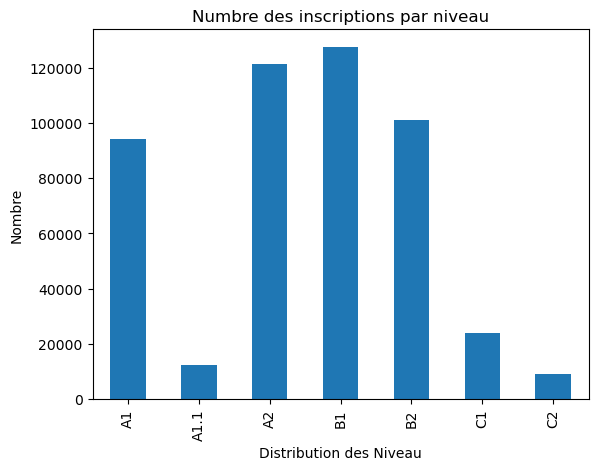

In [439]:
niveau_counts.plot(kind="bar")
plt.title("Numbre des inscriptions par niveau")
plt.xlabel("Distribution des Niveau")
plt.ylabel("Nombre")
plt.show()

**Visualisation du nombre de présents par niveau**

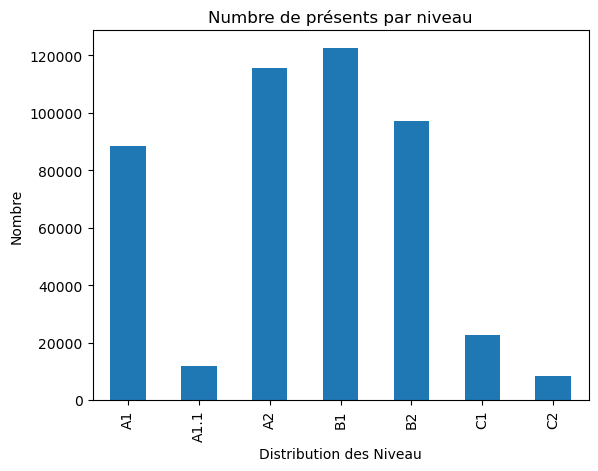

In [442]:
presents_par_niveau.plot(kind="bar")
plt.title("Numbre de présents par niveau")
plt.xlabel("Distribution des Niveau")
plt.ylabel("Nombre")
plt.show()

**Visualisation du nombre d'absents par niveau**

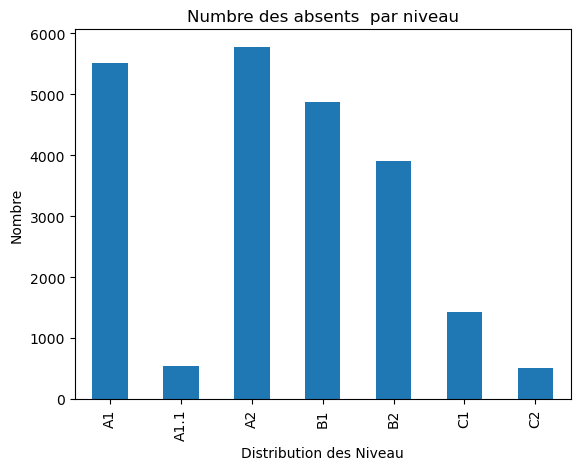

In [445]:
Absents_par_niveau.plot(kind="bar")
plt.title("Numbre des absents  par niveau")
plt.xlabel("Distribution des Niveau")
plt.ylabel("Nombre")
plt.show()

****Visualisation du Taux d'admission  par niveau****

**Avec ce graphique, nous visualisons le taux d'admission par niveau. On observe que le niveau A1 a le taux d'admission le plus élevé, ce qui peut s’expliquer par sa facilité. En revanche, le niveau C2 a le taux d'admission le plus bas, probablement en raison de sa difficulté. Cette représentation met en évidence la corrélation entre la difficulté des niveaux et leurs taux d'admission.**


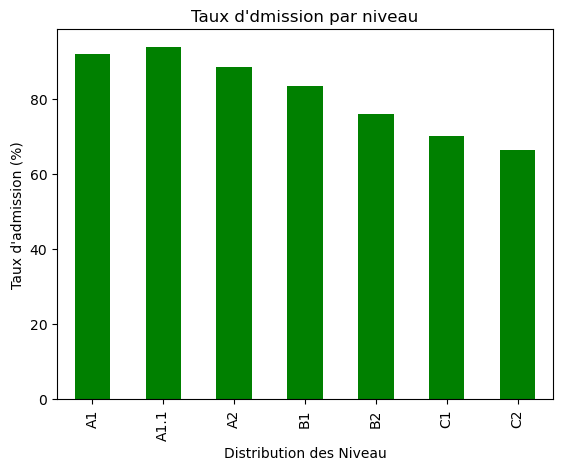

In [448]:
taux_admission_par_niveau.plot(kind="bar", color="green")
plt.title("Taux d'dmission par niveau")
plt.xlabel("Distribution des Niveau")
plt.ylabel("Taux d'admission (%)")
plt.show()

***Visualisation du Taux d'échec  par niveau***

**Ce graphique montre que le taux d'échec est le plus élevé pour le niveau C2, reflétant sa difficulté, et le plus bas pour le niveau A1, en raison de sa simplicité.**

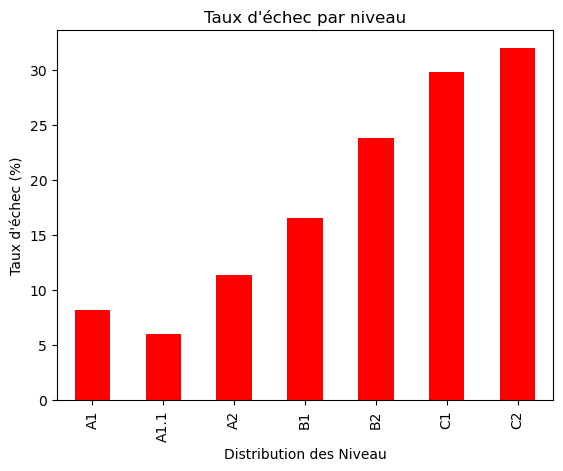

In [451]:
taux_nonAdmis_par_niveau.plot(kind="bar", color="red")
plt.title("Taux d'échec par niveau")
plt.xlabel("Distribution des Niveau")
plt.ylabel("Taux d'échec (%)")
plt.show()

***Visualisation du Top 5 des pays avec le plus grand nombre d'admis sous forme de diagramme circulaire***

**Ce code montre les 5 pays avec le plus d'admis à travers un tableau et un diagramme circulaire. Cela permet aux étudiants souhaitant passer le DELF de savoir où se trouvent le plus d'admis, ce qui peut indiquer une meilleure qualité d'éducation.**

Top 5 des pays avec le lus d'Admis  :
Pays
France       67080.0
Allemagne    40732.0
Italie       29966.0
Espagne      28661.0
Grèce        18709.0
Name: Admis, dtype: float64


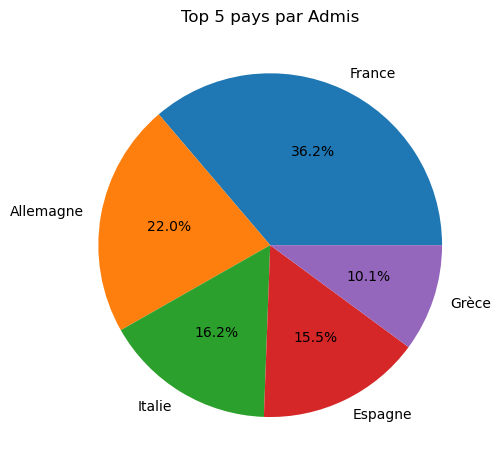

In [454]:
Top_5_admis_par_pays = data.groupby("Pays")["Admis"].sum().sort_values()[::-1].head(5)

print ( "\033[1mTop 5 des pays avec le lus d'Admis  :\033[0m")
print (Top_5_admis_par_pays)

Top_5_admis_par_pays.plot(kind="pie",autopct='%1.1f%%')
plt.title("Top 5 pays par Admis")
plt.ylabel("") 
plt.tight_layout()
plt.show()


**Top Villes par Admis dans les Top 5 Pays**

**Comme nous avons identifié les 5 meilleurs pays, nous continuons en trouvant la meilleure ville dans chaque pays parmi ces Top 5. Cela aide les étudiants à choisir la ville idéale pour passer le DELF. Les résultats sont présentés en tableau et graphique.**

Meilleur ville dans chaque pays parmi les Top 5 Pays:
          Pays    Ville    Admis
172      Grèce  Athènes  13792.0
20   Allemagne   Munich   9587.0
109     France     Lyon   6917.0
39     Espagne   Madrid   5689.0
240     Italie    Milan   4263.0


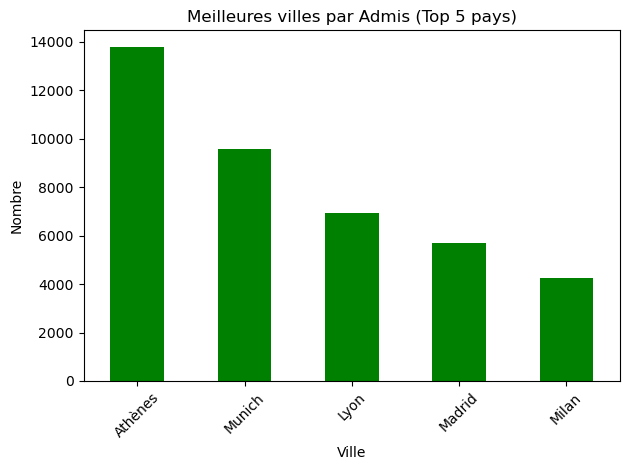

In [457]:
Top_5_admis_par_pays = data.groupby("Pays")["Admis"].sum().sort_values()[::-1].head(5).index

data_top_5 = data[data["Pays"].isin(Top_5_admis_par_pays)]
admis_par_ville_pays= data_top_5.groupby(["Pays", "Ville"])["Admis"].sum().reset_index()
admis_par_ville_pays= admis_par_ville_pays.sort_values("Admis")[::-1]
Top_5_ville = admis_par_ville_pays.drop_duplicates(subset ="Pays")
 


print("\033[1mMeilleur ville dans chaque pays parmi les Top 5 Pays:\033[0m")
print(Top_5_ville)

Top_5_ville.plot(kind="bar",x="Ville",y="Admis",legend=False, color="green")
plt.title("Meilleures villes par Admis (Top 5 pays)")
plt.xlabel("Ville")
plt.ylabel("Nombre")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



**Top Centres  dans Top 5 Villes**

**Comme nous avons analysé les 5 meilleurs pays, puis les meilleures villes dans ces pays, nous continuons avec les meilleurs centres dans ces villes. Cela permet d'identifier les centres les plus performants, utiles pour les étudiants et les professeurs pour savoir où les résultats sont les meilleurs, ce qui peut refléter une meilleure préparation ou des conditions favorables. Les résultats sont présentés sous forme de tableau et de graphique.**

**Nous avons utilisé les mêmes codes que pour les 5 pays et 5 villes, en ajoutant cette fois une analyse pour les 5 meilleurs centres.**

Meilleurs Centres dans les 5 meilleures Villes :
            Ville                                             Centre    Admis
0         Athènes   Ambassade de France - Institut français de Grèce  13792.0
12         Munich                           Institut français Munich   9587.0
1   Frederiksberg                                  Institut français   7550.0
11         Madrid               Institut français d'Espagne - Madrid   3108.0
10         Madrid                       Alliance Française de Madrid   2581.0
8            Lyon  Rectorat de l'académie de Lyon - Division des ...   1971.0
7            Lyon                                      REN Formation   1589.0
4            Lyon                         Alliance Française de Lyon   1493.0
5            Lyon                                          INFLEXYON   1003.0
2            Lyon                                    ACFAL FORMATION    365.0


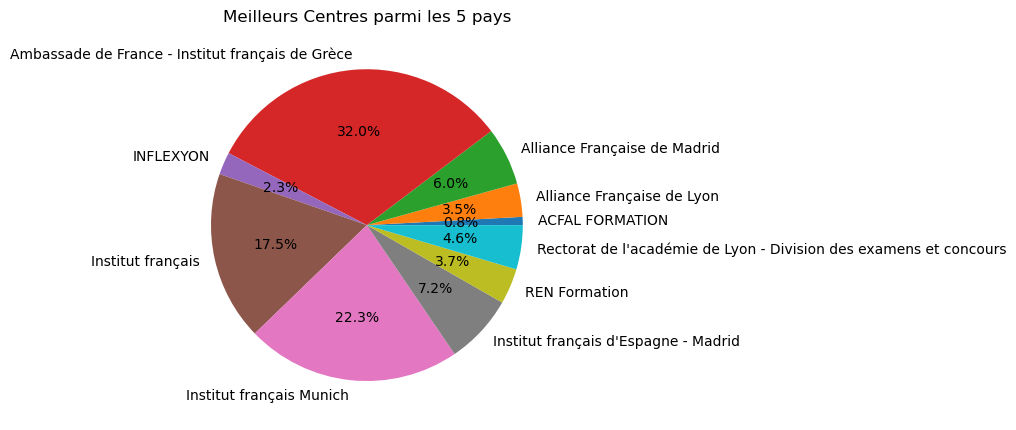

In [460]:

Top_5_admis_par_pays = data.groupby("Pays")["Admis"].sum().sort_values(ascending=False).head(5).index

data_top_5 = data[data["Pays"].isin(Top_5_admis_par_pays)]

admis_par_villes = data_top_5.groupby("Ville")["Admis"].sum()
Top_5_villes = admis_par_villes.sort_values(ascending=False).head(5).index
data_top_5_villes = data[data["Ville"].isin(Top_5_villes)]

admis_par_centre = data_top_5_villes.groupby(["Ville", "Centre"])["Admis"].sum().reset_index()
admis_par_centre = admis_par_centre.sort_values("Admis", ascending=False)

Top_5_centre = admis_par_centre.groupby("Ville").head(5)
print("\033[1mMeilleurs Centres dans les 5 meilleures Villes :\033[0m")
print(Top_5_centre)


admis_par_centre_total = Top_5_centre.groupby("Centre")["Admis"].sum()
admis_par_centre_total.plot(kind="pie", autopct='%1.1f%%', figsize=(9, 9))
plt.title("Meilleurs Centres parmi les 5 pays")
plt.ylabel("")
plt.tight_layout()
plt.show()



**Comparaison de la performance des niveux pour les 5 pays avec le plus grand nombre d'admis sous forme de graphique en barres**

**Cette analyse compare les performances des niveaux entre les 5 meilleurs pays. Elle permet d'identifier les pays où certains niveaux réussissent mieux ou rencontrent des difficultés, offrant une vue claire pour améliorer les stratégies éducatives.**

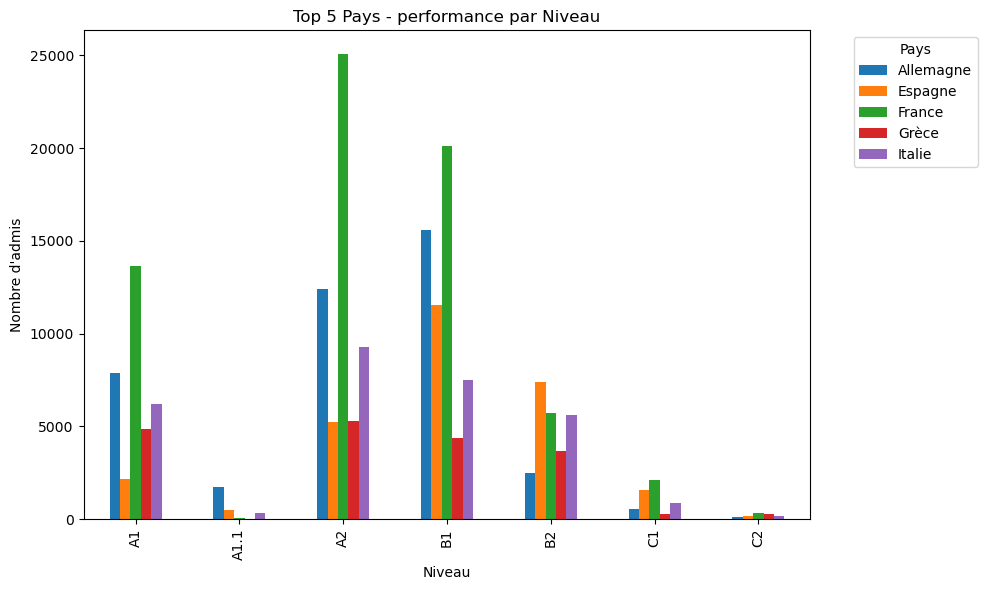

In [463]:
top_5_pays = data.groupby("Pays")["Admis"].sum().sort_values()[::-1].head(5).index
data_top_5= data[data["Pays"].isin(top_5_pays)]

niveau_vs_pays = data_top_5.pivot_table(values="Admis", index="Niveau",columns="Pays", aggfunc = "sum",fill_value=0)

niveau_vs_pays.plot(kind="bar" , figsize=(10,6)) 
plt.title("Top 5 Pays - performance par Niveau")
plt.xlabel("Niveau")
plt.ylabel("Nombre d'admis")
plt.legend(title="Pays", bbox_to_anchor=(1.05 , 1 ), loc="upper left")
plt.tight_layout()
plt.show()


**Visualisation du Top 5 des pays avec le plus faible nombre d'admis sous forme de graphique en barre**

**Cette analyse permet d'identifier les 5 pays avec le moins d'admis, ce qui aide à comprendre où les performances sont les plus faibles. Cela peut servir à cibler les efforts pour améliorer l’éducation ou fournir un soutien supplémentaire dans ces pays.**

Top 5 des pays avec le moins d'Admis  :
Pays
Palestine               2.0
Grenade                 3.0
Equateur                3.0
Saint-Kitts-et-Nevis    4.0
Gabon                   4.0
Name: Admis, dtype: float64


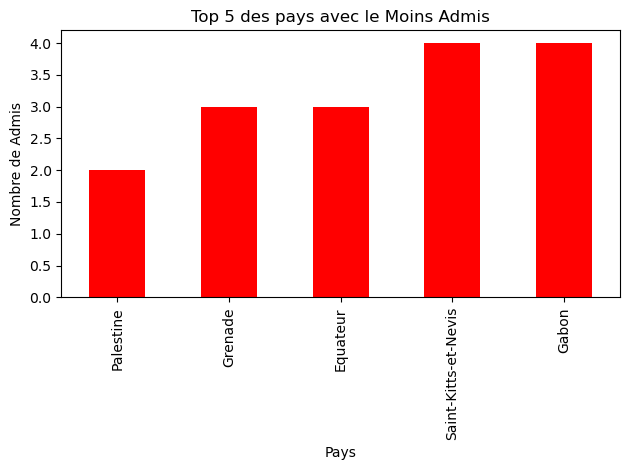

In [466]:
mois_5_pays= data.groupby("Pays")["Admis"].sum().sort_values().head(5)

print ( "\033[1mTop 5 des pays avec le moins d'Admis  :\033[0m")
print (mois_5_pays)

mois_5_pays.plot(kind="bar",color = "red")

plt.title("Top 5 des pays avec le Moins Admis")
plt.xlabel("Pays") 
plt.ylabel("Nombre de Admis")
plt.tight_layout()
plt.show()


## Conclusion 
**L’analyse a permis d’explorer les performances des candidats au DELF par pays, ville, centre, et niveau. En identifiant les meilleurs pays, villes et centres, elle met en évidence les endroits où les résultats sont les plus performants, ce qui peut refléter une meilleure qualité d’éducation ou des conditions favorables. De même, l’étude des pays et niveaux avec le moins de succès aide à repérer les points faibles nécessitant des améliorations**

**Cette analyse est particulièrement utile pour les étudiants étrangers, car elle leur permet de prendre des décisions éclairées sur le choix des pays, villes, ou centres où se préparer et passer le DELF. Les tableaux et graphiques offrent une vision claire et détaillée pour guider ces choix et optimiser les résultats. En résumé, l’analyse donne des informations précieuses pour soutenir les candidats et améliorer les performances globales.**


**Réalisé par :**

**Saleh BA-ZIGHIFAN**

**Abdulaziz Al-KHULAQI**